Author: Yun Xing


In [1]:
import sklearn as sk
import numpy as np
import os,sys
import matplotlib.pyplot as plt

Task 1. Finding the best classifier for the Mini-nesgroup data: several classifiers will be tested and the one with the best F1_macro is selected. The models tested are: Multinominal Naive Bayes, Bernoulli Naive Bayes, k Nearest Neighbor, and SVM

In [2]:
#Task 1.1 Hyperparameter tuning kNN models on normalized feature vectors
from sklearn.neighbors  import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.datasets import load_svmlight_file
import math

from sklearn.preprocessing import MaxAbsScaler
k=[]
KNN_score_mean_new=[]
KNN_score_ci_new=[]

def evaluate(training_filename,k):
    feature_vectors, targets = load_svmlight_file(training_filename)
    clf = KNeighborsClassifier(n_neighbors = k)
    transformer=MaxAbsScaler().fit(feature_vectors)
    X_new=transformer.transform(feature_vectors)
    scores = cross_val_score(clf, X_new, targets, cv=5, scoring='f1_macro')
    CI=1.96*scores.std()/math.sqrt(5)
    return scores.mean(),CI,scores

for i in range(1,16):
    mean,ci,scores=evaluate('TFIDF.text',i)
    k.append(i)
    KNN_score_mean_new.append(mean)
    KNN_score_ci_new.append(ci)
print('kNN hyperparameter tuning with normalized feature vectors complete!')

kNN hyperparameter tuning with normalized feature vectors complete!


In [3]:
#Task 1.2. hyperparameter tuning for kNN, training with original feature vectors

k=[]
KNN_score_mean=[]
KNN_score_ci=[]
def evaluate(training_filename,k):
    feature_vectors, targets = load_svmlight_file(training_filename)
    clf = KNeighborsClassifier(n_neighbors = k)
    scores = cross_val_score(clf, feature_vectors, targets, cv=5, scoring='f1_macro')
    CI=1.96*scores.std()/math.sqrt(5)
    return scores.mean(),CI,scores

#calculate f-scores at different k values and store the data in lists
for i in range(1,16):
    mean,ci,scores=evaluate('TFIDF.text',i)
    k.append(i)
    KNN_score_mean.append(mean)
    KNN_score_ci.append(ci)
print('kNN hyperparameter tuning with original feature vectors complete!')

kNN hyperparameter tuning with original feature vectors complete!


kNN hyperparameter tuning graph complete!


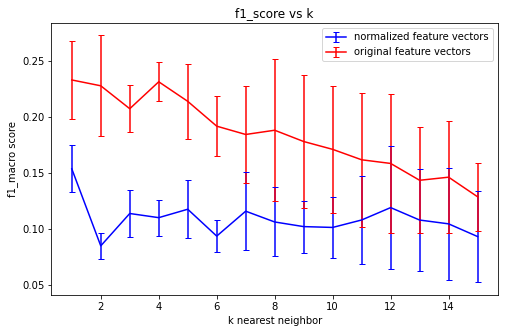

In [4]:
#plotting f-score against k value, with original and normalized feature vectors

fig=plt.figure(figsize=(8,5))
x=k
y=KNN_score_mean
y_new=KNN_score_mean_new
plt.errorbar(x,y_new,yerr=KNN_score_ci_new,capsize=3,color='b',label='normalized feature vectors')
plt.errorbar(x,y,yerr=KNN_score_ci,capsize=3,color='r',label='original feature vectors')
plt.xlabel('k nearest neighbor')
plt.ylabel('f1_macro score')
plt.title('f1_score vs k')
plt.legend()
print('kNN hyperparameter tuning graph complete!')

According to the results above, kNN model trained with normalized feature vectors has worse performance (lower f-scores) than the with the original feature vectors, thus the model with original feature vectors is chosen for the next step. 

For the kNN model trained with orginal feature vectors, k=1 and k=4 give the highest F1-score. Among these two, k=4 has a smaller confidence interval. Thus k=4 is best in all tested k's (1-15). 

In [5]:
# get the f_score for k=4 and store it in the f_scores list
f_scores=[]
f_err=[]
kNN_4mean,kNN_4ci,kNN_4scores=evaluate('TFIDF.text',4)
f_scores.append(kNN_4mean)
f_err.append(kNN_4ci)
print('kNN best f scores complete! ')

kNN best f scores complete! 


In [6]:
#Task 1.3 calculate f_score for the other three classifiers
#select the best classifer based on f-score and t-test results
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm  import SVC

feature_vectors, targets = load_svmlight_file('TFIDF.text')
transformer=MaxAbsScaler().fit(feature_vectors)
X_new=transformer.transform(feature_vectors)

# calculate F scores using the Bernoulli classifier
clf_ber= BernoulliNB()
Ber_scores = cross_val_score(clf_ber, feature_vectors, targets, cv=5, scoring='f1_macro')
Ber_ci=1.96*Ber_scores.std()/math.sqrt(5)
f_scores.append(Ber_scores.mean())
f_err.append(Ber_ci)

# calculate F scores using the Multinormial classifier
clf_mul = MultinomialNB()
Mul_scores = cross_val_score(clf_mul, feature_vectors, targets, cv=5, scoring='f1_macro')
Mul_ci=1.96*Mul_scores.std()/math.sqrt(5)
f_scores.append(Mul_scores.mean())
f_err.append(Mul_ci)

# calculate F scores using the SVM classifier
# compare the F scores trained with original and 
clf_svc = SVC()
SVC_scores = cross_val_score(clf_svc, feature_vectors, targets, cv=5, scoring='f1_macro')
SVC_ci=1.96*SVC_scores.std()/math.sqrt(5)
SVC_scores_new = cross_val_score(clf_svc, X_new, targets, cv=5, scoring='f1_macro')
SVC_ci_new=1.96*SVC_scores_new.std()/math.sqrt(5)
print("SVC f1_macro w/ orginal feature vectors: %0.2f (+/- %0.2f)" % (SVC_scores.mean(), SVC_ci )) 
print("SVC f1_macro w/ normalized feature vectors: %0.2f (+/- %0.2f)" % (SVC_scores_new.mean(), SVC_ci_new )) 
print('\n','f-scores for all 4 classifiers complete!')

SVC f1_macro w/ orginal feature vectors: 0.36 (+/- 0.06)
SVC f1_macro w/ normalized feature vectors: 0.32 (+/- 0.03)

 f-scores for all 4 classifiers complete!


In this task, we have calculated the f-scores for three more classifiers in addition to kNN. As shown above, SVC model trained with the original feature vectors performed better than that trained with normalized feature vectors. Thus the f-scores with original vectors will be used in the subsequent tasks. 

In [7]:
#store the SVC f-score means and confidence interval to lists: f_cores and f_err
f_scores.append(SVC_scores.mean())
f_err.append(SVC_ci)
print('best svc f-scores complete!')

best svc f-scores complete!


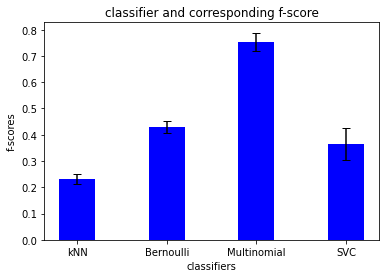

In [8]:
# plot a bar graph comparison of the different classifiers
classifiers=['kNN','Bernoulli','Multinomial','SVC']
plt.figure()  
# creating the bar plot
plt.bar(classifiers, f_scores, color ='blue',width = 0.4,yerr=f_err,capsize=4)
plt.xlabel("classifiers")
plt.ylabel("f-scores")
plt.title("classifier and corresponding f-score")
plt.show()

As shown by the bar graph, the multinomial model gives the highest f-score, thus this is the best classifier for the current dataset.The top 2 classifers are the Bernopulli and the Multinormomial.The following t-test will verify whether the difference between these two classifiers are statistically significant.

In [9]:
#perform a t-test between the two best cassifiers: the Bernoulli and the Multinormial
import scipy.stats as stats
# Performing the paired sample t-test
stats.ttest_rel(Ber_scores, Mul_scores)

Ttest_relResult(statistic=-18.837864705033734, pvalue=4.676376152744535e-05)

The test statistic comes out to be equal to -18.838 and the corresponding two-sided p-value is 4.676E-05.

Analysis: 
As the The paired samples t-test follows the null and alternative hypotheses:

H0: The two classifiers are equal in performance
HA: The two classifiers are not equal in performance 

As the p-value comes out to be equal to 4.676e-05 which is less than 0.05, we reject the null hypothesis (H0) and accept that the two classifiers are not equal, i.e.,the Multimomial classifier is significantly better than the Bernoulli.    

Task 1.4 Feature selection for naive bayes classifiers:
Two commonly used feature selection methods are evaluated here: the chi-squared method and the mutual information method. 

In [10]:
#calculate the f-scores for the Bernoulli and Multinomial classifer
# at different feature numbers (100-3000), applying two feature selection methods 
# for each classifer: the chi-square method, the mutual information classifier method

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, mutual_info_classif

mul_mean_chi=[]
mul_err_chi=[]
mul_mean_mi=[]
mul_err_mi=[]
Ber_mean_chi=[]
Ber_err_chi=[]
Ber_mean_mi=[]
Ber_err_mi=[]

feature_num=[100,200,500,1000,1500,2000,2500,3000]
feature_vectors, targets = load_svmlight_file('TFIDF.text')
X = feature_vectors
y = targets
# calculate f-scores at different number of features with Bernouli and the Multinormial classifier
for i in feature_num:
    X_new1 = SelectKBest(chi2, k=i).fit_transform(X, y)
    X_new2 = SelectKBest(mutual_info_classif, k=i).fit_transform(X, y)
    #calculate the f scores for multinormial classifer at k=i
    clf1 = MultinomialNB()
    mul_scores_chi = cross_val_score(clf1, X_new1, targets, cv=5, scoring='f1_macro')
    mul_scores_mi = cross_val_score(clf1, X_new2, targets, cv=5, scoring='f1_macro')
    mul_mean_chi.append(mul_scores_chi.mean())
    mul_mean_mi.append(mul_scores_mi.mean())
    mul_err_chi.append(1.96*mul_scores_chi.std()/math.sqrt(5))
    mul_err_mi.append(1.96*mul_scores_mi.std()/math.sqrt(5))
     #calculate the f scores for Bernoulli classifer at k=i
    clf2 = BernoulliNB()
    Ber_scores_chi = cross_val_score(clf2, X_new1, targets, cv=5, scoring='f1_macro')
    Ber_scores_mi = cross_val_score(clf2, X_new2, targets, cv=5, scoring='f1_macro')
    Ber_mean_chi.append(Ber_scores_chi.mean())
    Ber_mean_mi.append(Ber_scores_mi.mean())
    Ber_err_chi.append(1.96*Ber_scores_chi.std()/math.sqrt(5))
    Ber_err_mi.append(1.96*Ber_scores_mi.std()/math.sqrt(5))
print('Feature selection complete!')

Feature selection complete!


In this section, effects of the number of features on model performnance was evaluated; two feature selection methods:chi-square and the mutual information classifier, were used. Features number ranging from 100 to 3000 were tested on both the Bernoulli and Multinomial classifiers. The f-scores for each model at each feature number were calculated and stored in a list that is to be used in the subsequent plots. 

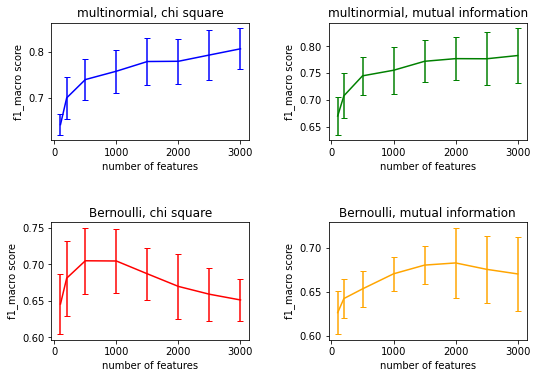

In [11]:
# plot the f-scores with feature number
x=feature_num
Y1=mul_mean_chi
Y2=mul_mean_mi
Y3=Ber_mean_chi
Y4=Ber_mean_mi
# Initialise the subplot function using number of rows and columns
figure, axis = plt.subplots(2, 2)

# For Multimormial with Chi square method
axis[0,0].errorbar(x, Y1,yerr=mul_err_chi,capsize=3,color='blue')
axis[0,0].set_title("multinormial, chi square")
axis[0,0].set_xlabel('number of features')
axis[0,0].set_ylabel('f1_macro score')

# For Multimormial with mutual information  method
axis[0,1].errorbar(x, Y2,yerr=mul_err_mi,capsize=3,color='green')
axis[0,1].set_title("multinormial, mutual information")
axis[0,1].set_xlabel('number of features')
axis[0,1].set_ylabel('f1_macro score')

# For Bernoulli with chi square method
axis[1,0].errorbar(x, Y3,yerr=Ber_err_chi,capsize=3,color='red')
axis[1,0].set_title("Bernoulli, chi square")
axis[1,0].set_xlabel('number of features')
axis[1,0].set_ylabel('f1_macro score')

# For Bernoulli with mutual information method
axis[1,1].errorbar(x, Y4,yerr=Ber_err_mi,capsize=3,color='orange')
axis[1,1].set_title("Bernoulli, mutual information")
axis[1,1].set_xlabel('number of features')
axis[1,1].set_ylabel('f1_macro score')

# set the spacing between subplots
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=1.2, 
                    top=1.2, 
                    wspace=0.4, 
                    hspace=0.7)
plt.show()

As shown in the above figures, for the Multinomial classifier, the higher the number of features, the higher the f_score, with the highest occurring at k=3000.The trend is similar for both the chi-square and the mutual_information classifier method. The Bernoulli classifier,on the other hand, showed a different trend, with the best performance occuring in the middle: for the chi square method, best performance occures at k=500; for the mutual information method, it is at k=2000 .   

Task 2. Document clustering models

In [12]:
# Task 2.1.normalizing the vector length 
#use chi square method and k=500 for feature vector selection
X_test = SelectKBest(chi2, k=500).fit_transform(X, y)
from sklearn.preprocessing import normalize
x_normalized = normalize(X_test)
print('vector normalization complete!')

vector normalization complete!


Feature vectors (k=500) selected using the chi-square method were normalized. These normalized feature vectors are used in the subsequent task 2.2. 

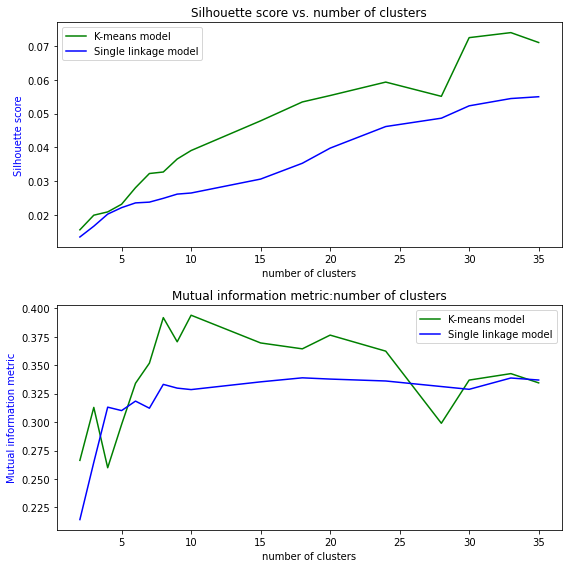

clustering quality check complete!


In [13]:
#Task 2.2. Evaluate the clustering quality of two clustering algorithms:Kmeans and Sibgle linakge model
#using the length-normalized and selected feature vectors obtained in task 2.1. 
#Each algorithm was tested over a range of cluster numbers [2,35]
#Clustering quality was measured by: 1) the Sihouette Coefficient (SC) 
#and 2) Normalized Mutual Information (NMI) measures.

from sklearn.cluster import KMeans,AgglomerativeClustering
from sklearn import metrics
cluster_num=[2,3,4,5,6,7,8,9,10,15,18,20,24,28,30,33,35] 
km_s_score=[]
km_nmi_score=[]
slm_s_score=[]
slm_nmi_score=[]
featureV=x_normalized.toarray() 
for i in cluster_num:
    # calculate the metrics for Kmeans model
    kmeans_model = KMeans(n_clusters=i).fit(featureV)
    clustering_labels_km = kmeans_model.labels_
    s_score_km=metrics.silhouette_score(featureV, clustering_labels_km, metric='euclidean')
    nmi_score_km=metrics.normalized_mutual_info_score(y, clustering_labels_km)
    km_s_score.append(s_score_km)
    km_nmi_score.append(nmi_score_km)
    # calculate the metrics for single linkage model
    single_linkage_model = AgglomerativeClustering(
        n_clusters=i, linkage='ward').fit(featureV)
    clustering_labels_slm = single_linkage_model.labels_
    s_score_slm=metrics.silhouette_score(featureV, clustering_labels_slm, metric='euclidean')
    nmi_score_slm=metrics.normalized_mutual_info_score(y, clustering_labels_slm)
    slm_s_score.append(s_score_slm)
    slm_nmi_score.append(nmi_score_slm)

#plotting the metrics againt number of clusters, one figure for each metric
x=cluster_num
y1=km_s_score
y2=km_nmi_score
y3=slm_s_score
y4=slm_nmi_score

fig, axs = plt.subplots(2,figsize = (8, 8))
#generate Silhouette figure

axs[0].plot(x, y1, color = 'g',label='K-means model')
axs[0].plot(x, y3, color = 'b',label='Single linkage model')
 
# giving labels, title and secondary axis label to the Silhouette figure
axs[0].set_xlabel('number of clusters', color = 'black')
axs[0].set_ylabel('Silhouette score', color = 'b')
axs[0].set_title('Silhouette score vs. number of clusters')
axs[0].legend(loc='best')

#generate mutual information figure

axs[1].plot(x, y2, color = 'g',label='K-means model')
axs[1].plot(x, y4, color = 'b',label='Single linkage model')
 
# giving labels, title and secondary axis label to the mutual information model figrue
axs[1].set_xlabel('number of clusters', color = 'black')
axs[1].set_ylabel('Mutual information metric', color = 'b')
axs[1].set_title('Mutual information metric:number of clusters')
axs[1].legend(loc='best')
# defining display layout
plt.tight_layout()
 
# show plot
plt.show()

print('clustering quality check complete!')

As shown in the sihlouette metric figure above, k-means model performs consistently better than the single-linkage model at all tested cluster numbers. The performance of both model shows an increasing trend as the number of clusters increase, with K-means model shows some fluctuations, and the single-linkage model is relatively smooth.  

The mutual information metric showed an initial performance imporvement as cluster number increases, for single linkage model, it plateued at around 9 clusters, the K-means model flutuates a lot for clusters number less than 10, but the overall trend was also initial increase followed by flattening out at higher number of clusters. Overall, K-means model also performed slightly better than Single linkage model, but the difference is small.   